 # Data Exploration 

In this file we take the data that was cleaned and processed from raw and begin to look at distributions and interactions as well as transform some features.

## Step 1 
>We begin by importing necesaary packages, loading the data, and confirming that all data has loaded properly.

In [3]:
#Code for importing packages
import pandas as pd 
import numpy as np  
from pandas_profiling import ProfileReport 
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('seaborn')
sns.set(style='darkgrid', color_codes=True) 

In [4]:
#Loadies data, drops unneeded columns, and sets our target column 
data = pd.read_csv('processed_data.csv')   #loads dataset
del data['Unnamed: 0'] #deletes the unnames column
del data['job'] #deletes the job column 
target = data['works_in_tech'] #sets the target for the models

In [5]:
#Checks first five rows of dataframe
data.head()

,age,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,location,offspring,pets,religion,sign,smokes,speaks,works_in_tech,above_average_height
0,22,male,straight,body_curvy/full_figured,diet_anything,drinks,no_drugs,no_college_degree,asian,75.0,san_francisco_ca,no_kids,likes_dogs_and_cats,agnosticism,gemini,smokes,speaks_english,0,above_average_height
1,35,male,straight,body_average,diet_other,drinks,drugs,unknown_education,white,70.0,not_san_francisco,no_kids,likes_dogs_and_cats,agnosticism,cancer,does_not_smoke,speaks_spanish,0,above_average_height
2,29,male,straight,body_fit/athletic,unkown_diet,drinks,no_drugs,college_graduate_or_higher,black,66.0,san_francisco_ca,unknown_if_kids,likes_dogs_and_cats,religion_other/unknown,aquarius,does_not_smoke,speaks_english,0,above_average_height
3,29,male,straight,body_average,diet_anything,drinks,unknown_if_drugs,college_graduate_or_higher,white,67.0,san_francisco_ca,no_kids,likes_cats,atheism,taurus,does_not_smoke,speaks_chinese,1,above_average_height
4,31,female,straight,body_average,diet_anything,drinks,no_drugs,college_graduate_or_higher,white,65.0,san_francisco_ca,no_kids,likes_dogs_and_cats,christianity,sagittarius,does_not_smoke,speaks_spanish,0,above_average_height


In [6]:
#Check all the column titles in the dataframe
data.keys()

Index(['age', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs',
       'education', 'ethnicity', 'height', 'location', 'offspring', 'pets',
       'religion', 'sign', 'smokes', 'speaks', 'works_in_tech',
       'above_average_height'],
      dtype='object')

In [5]:
#Confirms length of dataframe
len(data)

38317

## Step 2 Visualization of the Data   
>Now that we know our data las been set up properly we can being to use visualizations to see if anything jumps out at us. This coud be insights to look into, things that needed to be corrected, or  just interesting things to note in our presentation.

In [6]:
#Here we use the profile report package to run an intial report of our data with visuals included
data_profile = ProfileReport(data, title = 'OKC Profile Data')
data_profile

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Note 1: 
From this initial report we can see that there is an initial interaction between height and working in tech likely resulting from the over representation of men in the field. It would now be helpful see the charts side by side.


In [7]:
data.keys()

Index(['age', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs',
       'education', 'ethnicity', 'height', 'location', 'offspring', 'pets',
       'religion', 'sign', 'smokes', 'speaks', 'works_in_tech',
       'above_average_height'],
      dtype='object')

In [10]:
#Based on the above report I know I would like to the distribution graphs side by side 
 
numerical = ['age', 'height']

categorical = ['sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs','education', 'ethnicity',  
               'location', 'offspring', 'pets', 'religion', 'sign', 'smokes', 'speaks','above_average_height']

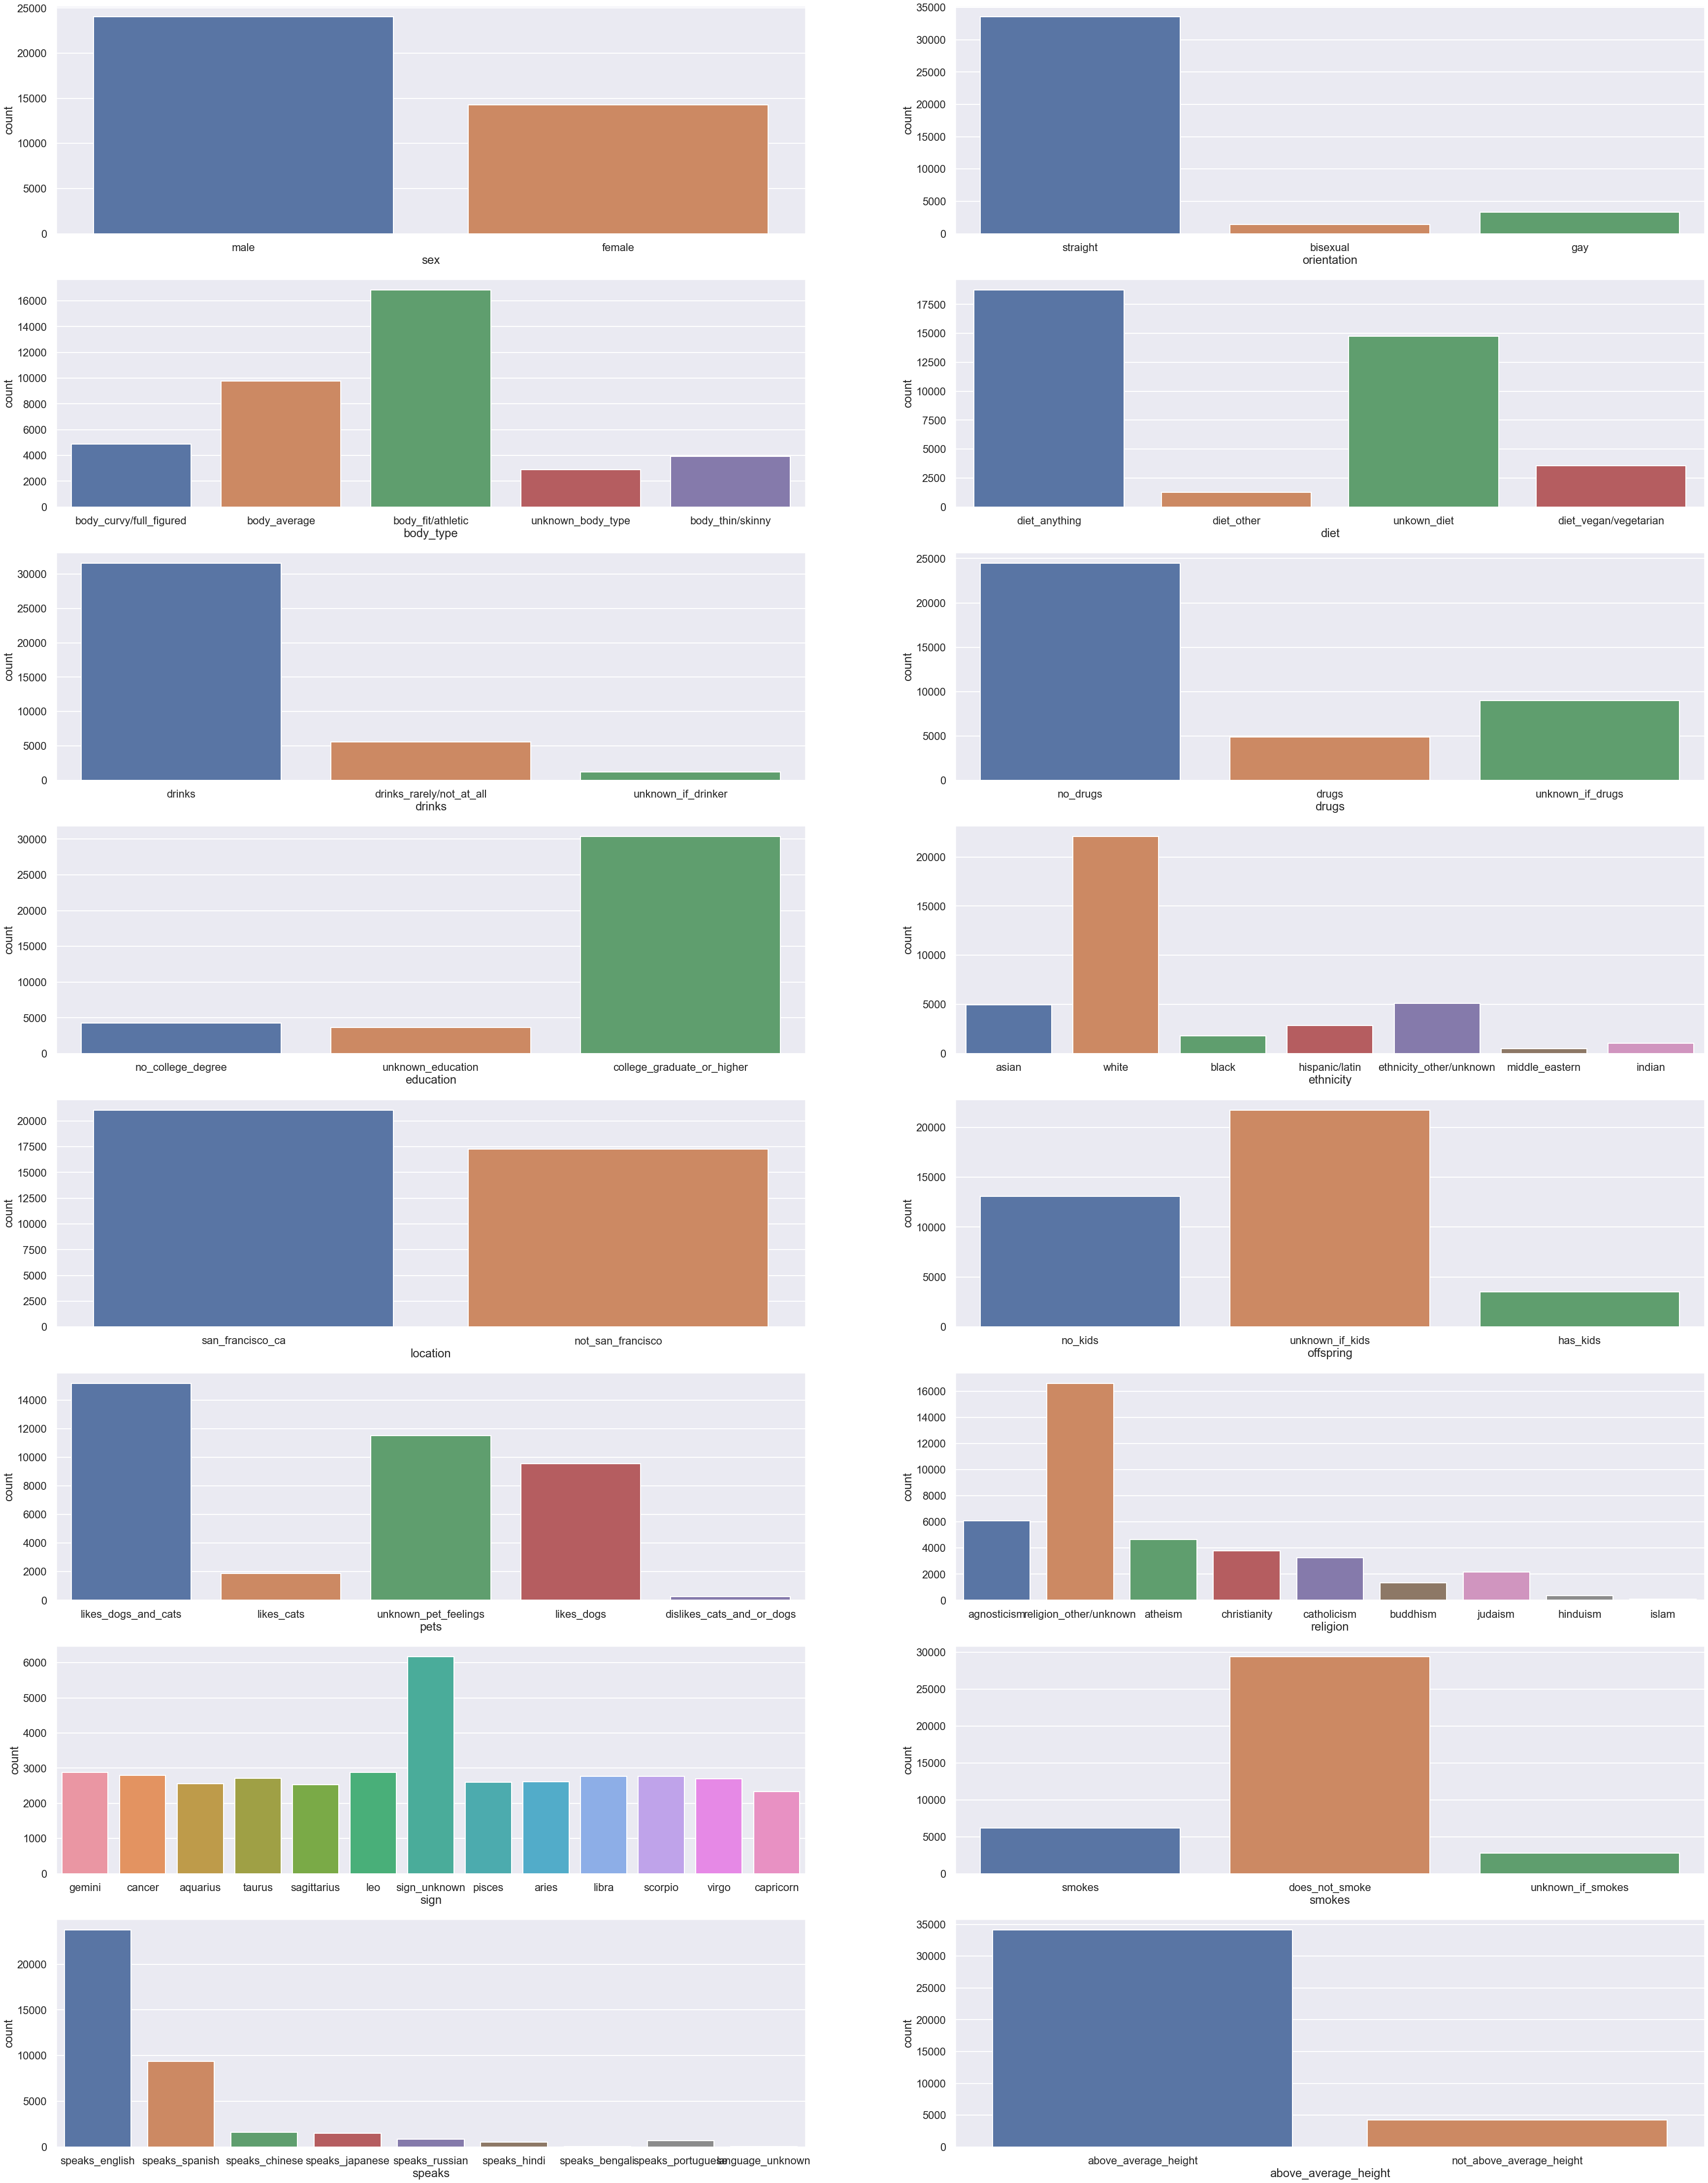

In [11]:
#Generates charts for all the catagorical columns
sns.set_context("poster")
fig, ax = plt.subplots(8, 2, figsize=(60, 80))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
#     for label in subplot.get_xticklabels():
#         label.set_rotation(90)

### Note 2: 

Looking at all the catagorical data side by side, we can see that many features are very imbalanced. This is likely to have an effect on our final model. 

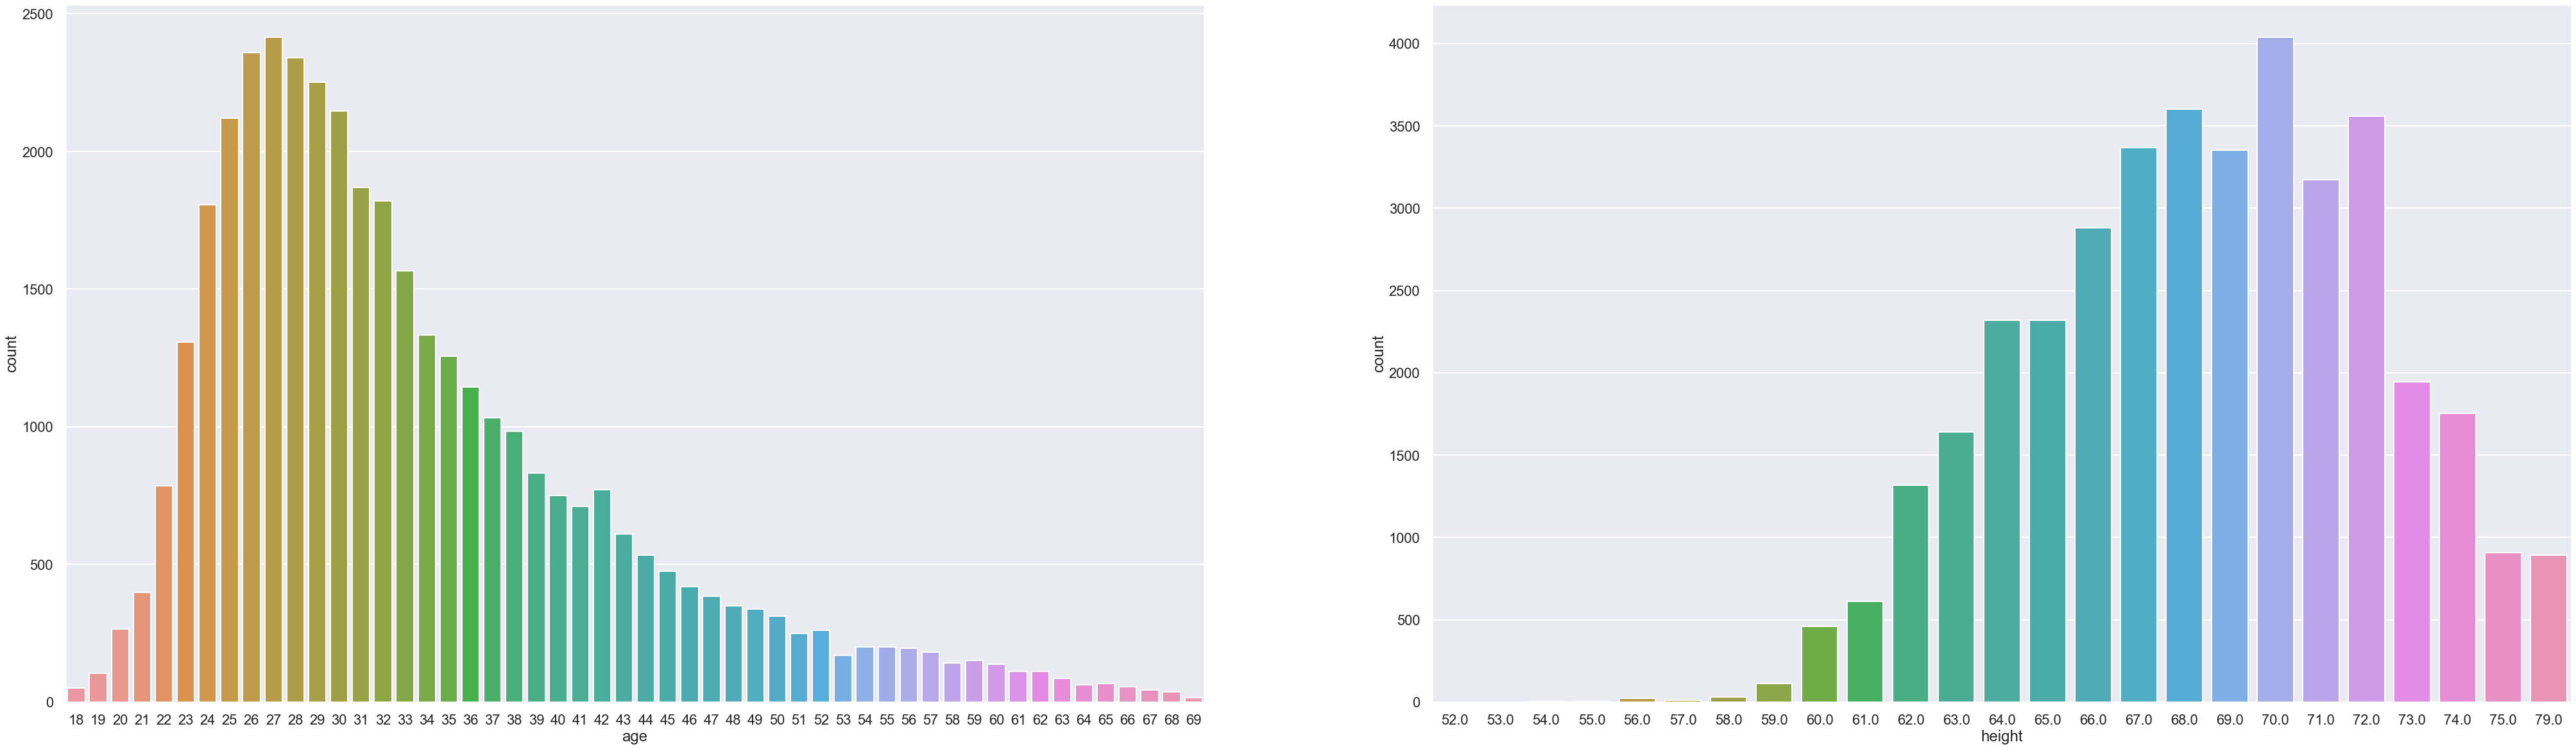

In [12]:
#Generates charts for all the numerical columns
sns.set_context("poster")
fig, ax = plt.subplots(1, 2, figsize=(70, 20))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)

### Note 3: 

Our numerical charts demonstart that data skews a bit younger and a bit taller in general. 

<AxesSubplot:xlabel='works_in_tech', ylabel='Count'>

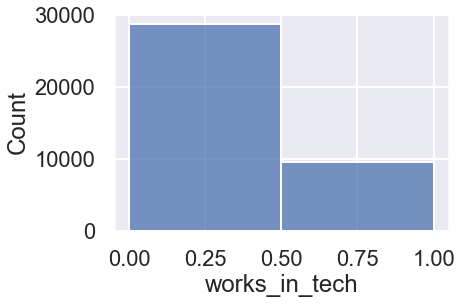

In [13]:
#Plots our target column
sns.histplot(data, bins=2, x="works_in_tech")


### Note 4: 

From this chart we can see that we have a major clas imbalance that will need to be addressed. 

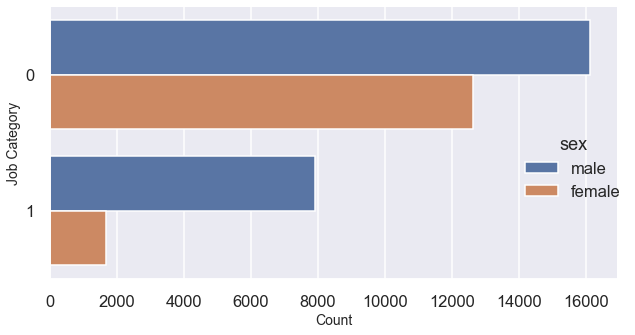

In [14]:
sns.set_context("talk")
sns.catplot( y='works_in_tech', kind="count",  hue="sex", aspect=1.5, data=data)
plt.xlabel("Count", size=14)
plt.ylabel("Job Category", size=14)
plt.tight_layout()

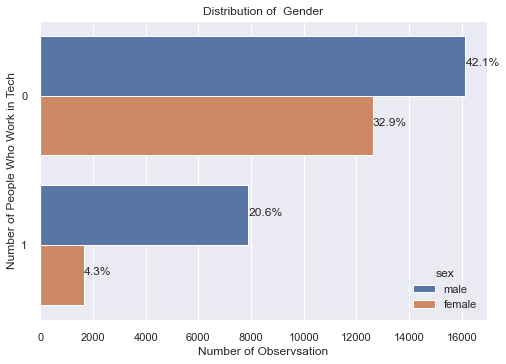

In [13]:
ax = sns.countplot(y="works_in_tech", data=data, hue='sex', palette="CMRmap")
plt.title('Distribution of  Gender')
plt.xlabel('Number of Observsation') 
plt.ylabel('Number of People Who Work in Tech')

total = len(data['works_in_tech'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

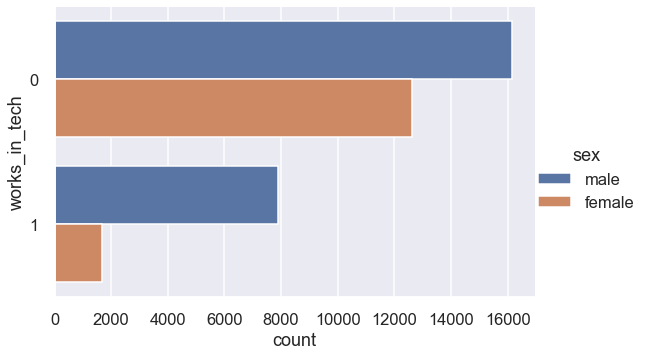

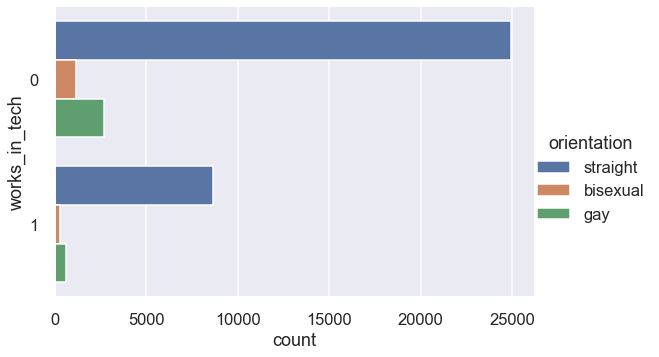

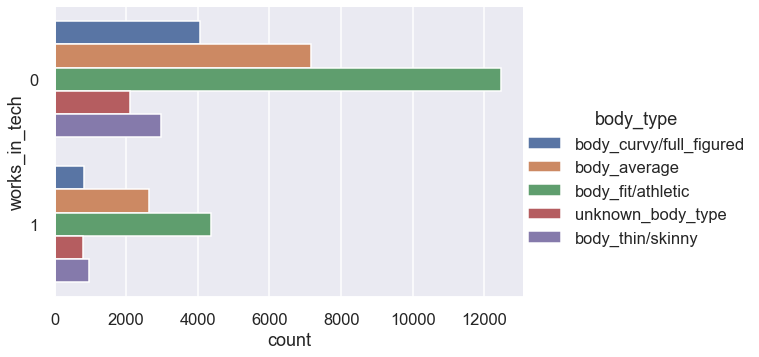

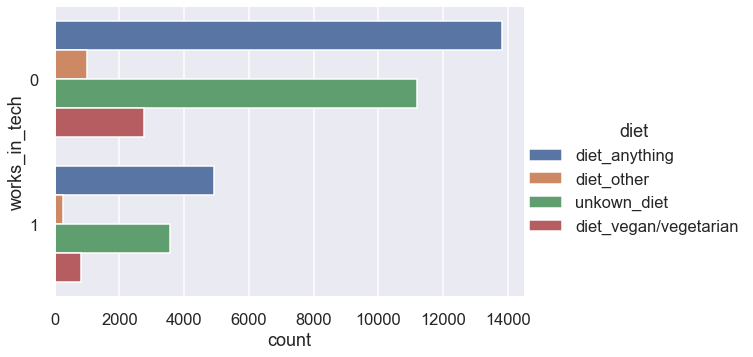

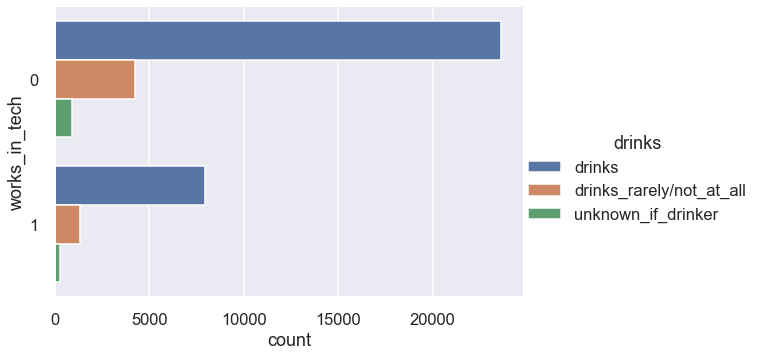

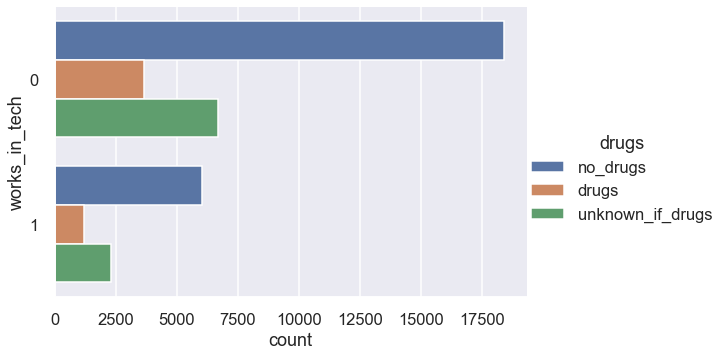

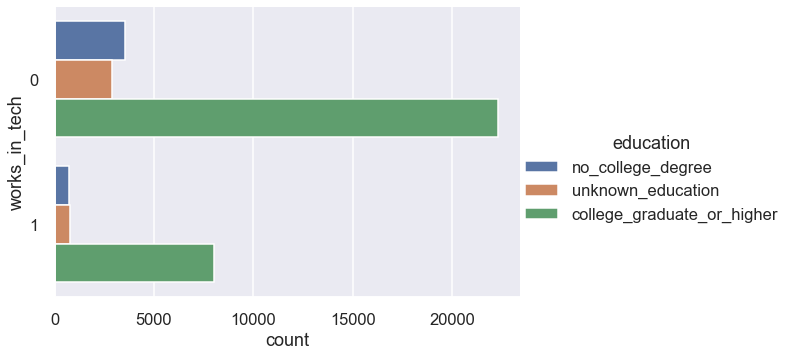

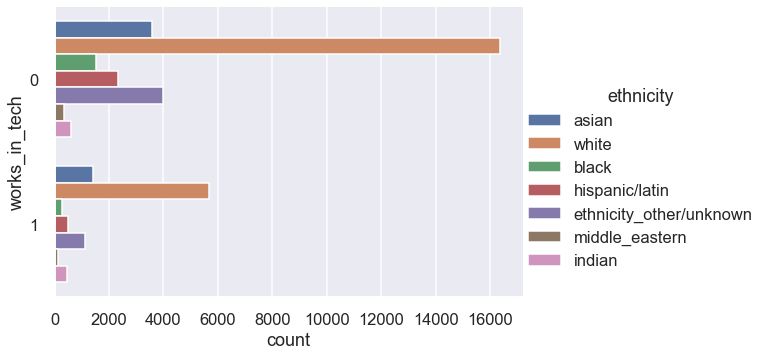

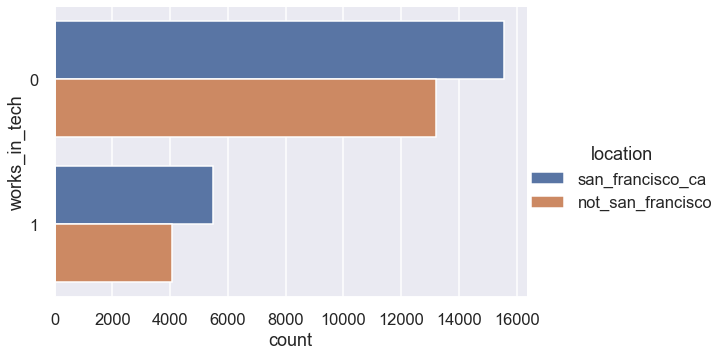

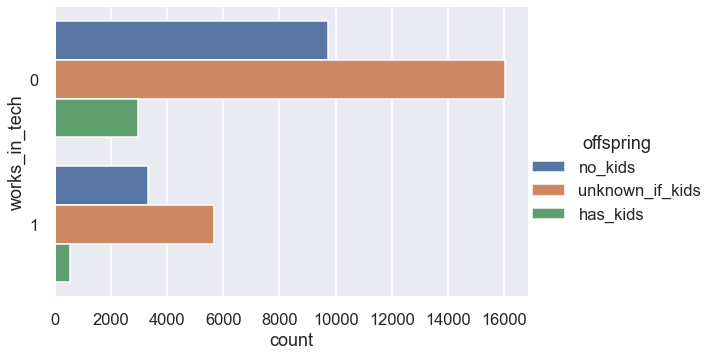

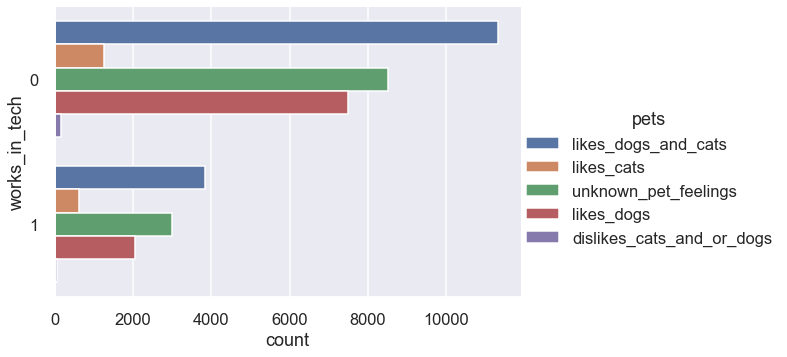

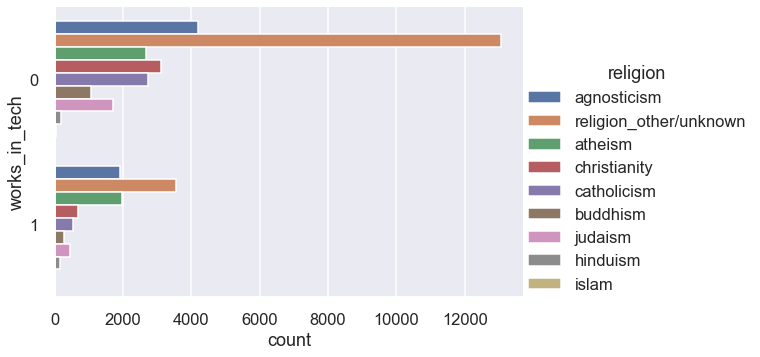

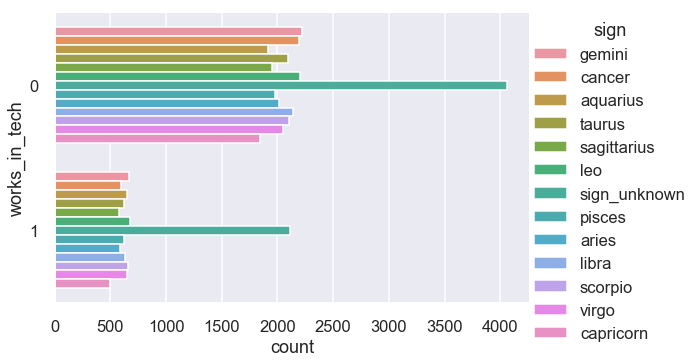

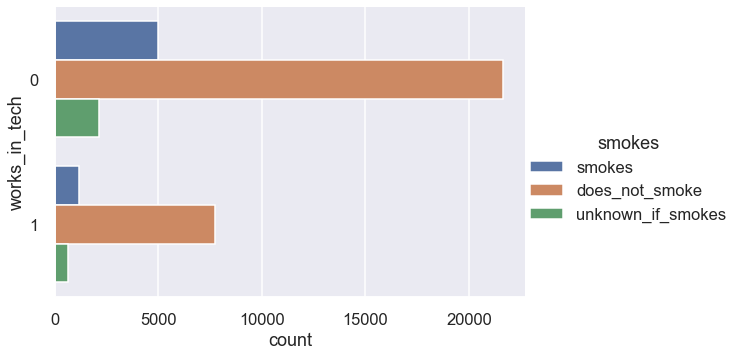

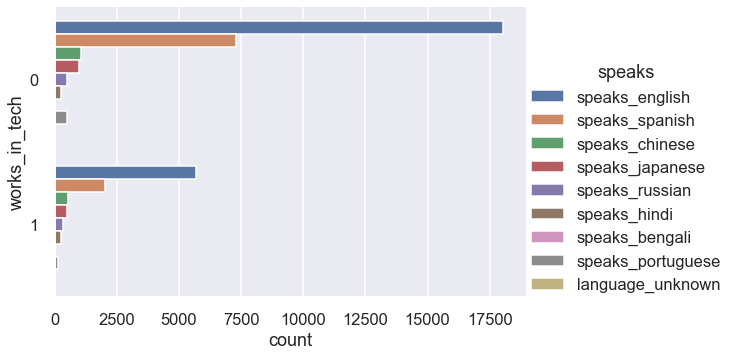

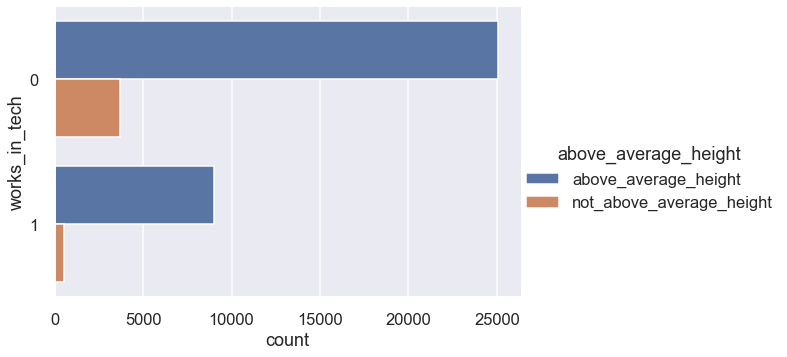

In [15]:
#This function creates the same histograms as above but group by job category 
def group_graph(data):
    #fig, ax = plt.subplots(8, 2, figsize=(60, 80))
    for feat in data[categorical]:    
        sns.catplot( y='works_in_tech', kind="count",  hue=feat, aspect=1.5, data=data, ax=subplot) 
group_graph(data)

### Note 5
Having looked at the data in all of the various ways above, there are some things that start to show up such as the higher representation of the Asian and Indian ethnicity as compared all other jobs. next we will be creating some new csv in which we turn all categorical features into dummies.

## Step 3:  Creating Dummy Categories and CSV Files  
>The next few steps will cover creating the dummy variables and the creating csv files for them.

In [19]:
#Sets the current data sets as is to a new csv file
data.to_csv('data_nd.csv')

In [21]:
#Creates a copy for the dataset to work with
df1 = data.copy()

In [22]:
df1.keys()

Index(['age', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs',
       'education', 'ethnicity', 'height', 'location', 'offspring', 'pets',
       'religion', 'sign', 'smokes', 'speaks', 'works_in_tech',
       'above_average_height'],
      dtype='object')

In [23]:
#Applying the dummy catagories function to uneven distributed variables list 

dum1 = pd.get_dummies(df1['sex'])
df3 = pd.concat([df1, dum1], axis=1)  
df3 = df3.drop(columns = 'sex') 

dum2 = pd.get_dummies(df3['orientation'])
df3 = pd.concat([df3, dum2], axis=1)  
df3= df3.drop(columns = 'orientation') 

dum2 = pd.get_dummies(df3['body_type'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'body_type') 

dum2 = pd.get_dummies(df3['diet'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'diet') 

dum2 = pd.get_dummies(df3['drinks'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'drinks') 

dum2 = pd.get_dummies(df3['drugs'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'drugs')

dum2 = pd.get_dummies(df3['education'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'education') 

dum2 = pd.get_dummies(df3['ethnicity'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'ethnicity') 

dum2 = pd.get_dummies(df3['offspring'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'offspring') 

dum2 = pd.get_dummies(df3['pets'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'pets') 

dum2 = pd.get_dummies(df3['religion'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'religion')

dum2 = pd.get_dummies(df3['smokes'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'smokes') 

dum2 = pd.get_dummies(df3['above_average_height'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'above_average_height')  

dum2 = pd.get_dummies(df3['location'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'location') 

dum2 = pd.get_dummies(df3['sign'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'sign')  

dum2 = pd.get_dummies(df3['speaks'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'speaks') 

In [24]:
df3.keys()

Index(['age', 'height', 'works_in_tech', 'female', 'male', 'bisexual', 'gay',
       'straight', 'body_average', 'body_curvy/full_figured',
       'body_fit/athletic', 'body_thin/skinny', 'unknown_body_type',
       'diet_anything', 'diet_other', 'diet_vegan/vegetarian', 'unkown_diet',
       'drinks_rarely/not_at_all', 'unknown_if_drinker', 'no_drugs',
       'unknown_if_drugs', 'college_graduate_or_higher', 'no_college_degree',
       'unknown_education', 'asian', 'black', 'ethnicity_other/unknown',
       'hispanic/latin', 'indian', 'middle_eastern', 'white', 'has_kids',
       'no_kids', 'unknown_if_kids', 'dislikes_cats_and_or_dogs', 'likes_cats',
       'likes_dogs', 'likes_dogs_and_cats', 'unknown_pet_feelings',
       'agnosticism', 'atheism', 'buddhism', 'catholicism', 'christianity',
       'hinduism', 'islam', 'judaism', 'religion_other/unknown',
       'does_not_smoke', 'unknown_if_smokes', 'not_above_average_height',
       'not_san_francisco', 'san_francisco_ca', 'aquariu

In [25]:
df3.to_csv('data_ad.csv')